In [39]:
require("summarytools")
require("dplyr")
require("repr")
library(DataExplorer)

In [40]:
df <- read.csv("./BankChurners.csv")
head(df)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,...,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691,777,11914,1.335,1144,42,1.625,0.061,9.3448e-05,0.99991
2,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256,864,7392,1.541,1291,33,3.714,0.105,5.6861e-05,0.99994
3,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418,0,3418,2.594,1887,20,2.333,0.000,2.1081e-05,0.99998
4,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313,2517,796,1.405,1171,20,2.333,0.760,1.3366e-04,0.99987
5,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716,0,4716,2.175,816,28,2.500,0.000,2.1676e-05,0.99998
6,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010,1247,2763,1.376,1088,24,0.846,0.311,5.5077e-05,0.99994


In [41]:
df = subset(df, select = -c(CLIENTNUM,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2))
head(df)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691,777,11914,1.335,1144,42,1.625,0.061
2,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256,864,7392,1.541,1291,33,3.714,0.105
3,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418,0,3418,2.594,1887,20,2.333,0.000
4,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313,2517,796,1.405,1171,20,2.333,0.760
5,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716,0,4716,2.175,816,28,2.500,0.000
6,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010,1247,2763,1.376,1088,24,0.846,0.311


In [42]:
summary(df)

 Attrition_Flag      Customer_Age      Gender          Dependent_count
 Length:10127       Min.   :26.00   Length:10127       Min.   :0.000  
 Class :character   1st Qu.:41.00   Class :character   1st Qu.:1.000  
 Mode  :character   Median :46.00   Mode  :character   Median :2.000  
                    Mean   :46.33                      Mean   :2.346  
                    3rd Qu.:52.00                      3rd Qu.:3.000  
                    Max.   :73.00                      Max.   :5.000  
 Education_Level    Marital_Status     Income_Category    Card_Category     
 Length:10127       Length:10127       Length:10127       Length:10127      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                         

In [43]:
rle(sort(df$Attrition_Flag))


Run Length Encoding
  lengths: int [1:2] 1627 8500
  values : chr [1:2] "Attrited Customer" "Existing Customer"

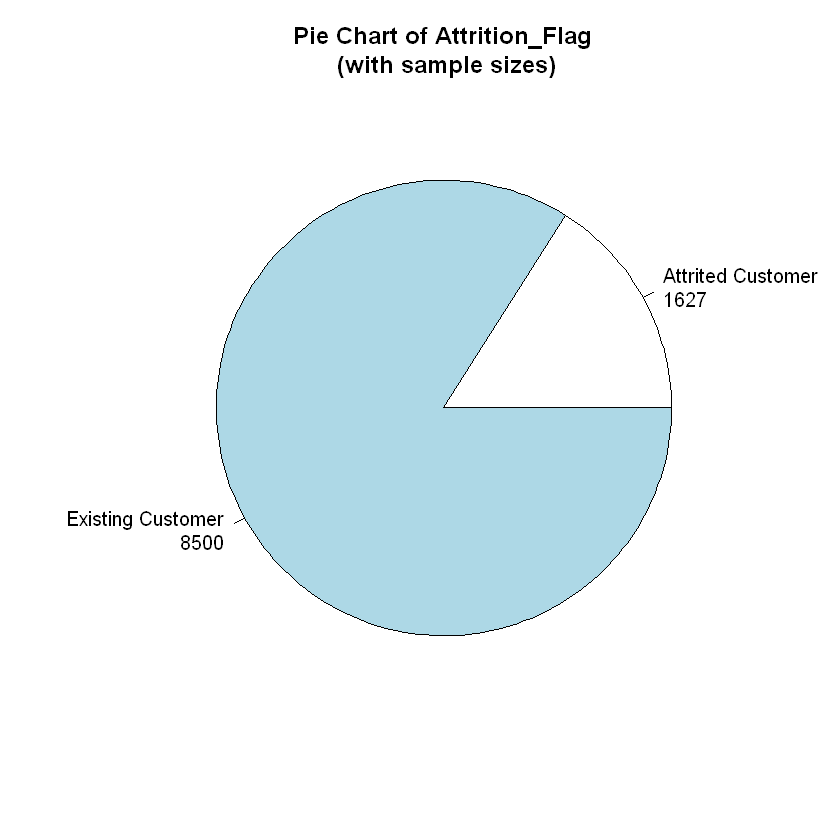

In [44]:
mytable <- table(df$Attrition_Flag)
lbls <- paste(names(mytable), "\n", mytable, sep="")
pie(mytable, labels = lbls,
   main="Pie Chart of Attrition_Flag\n (with sample sizes)")a

In [45]:
introduce(df)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
10127,20,6,14,0,0,10127,202540,1262496


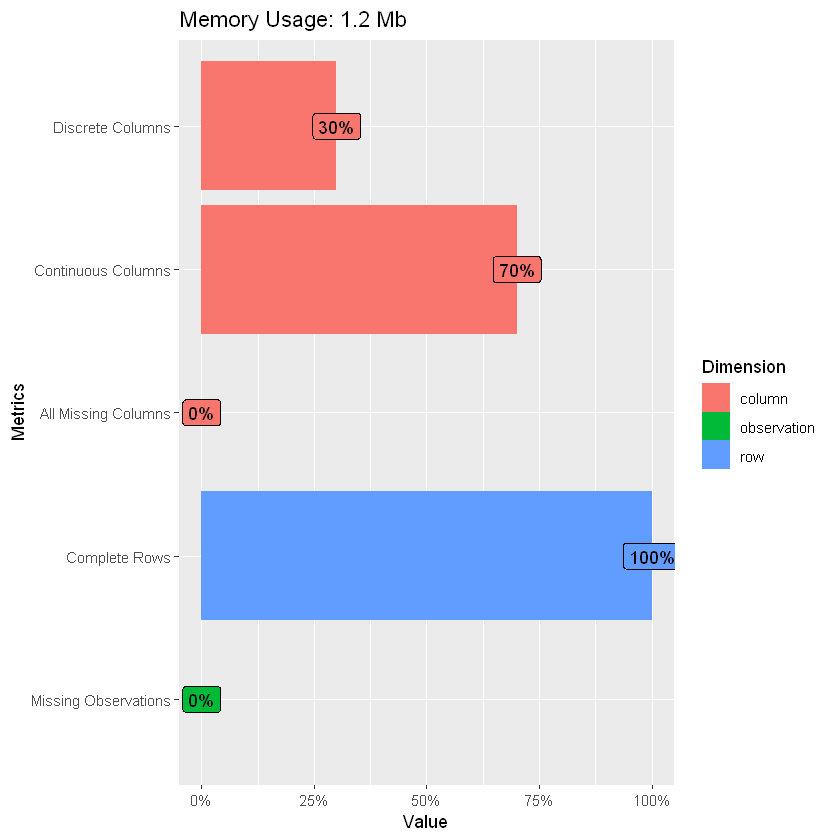

In [46]:
## Plot basic description for airquality data
plot_intro(df)

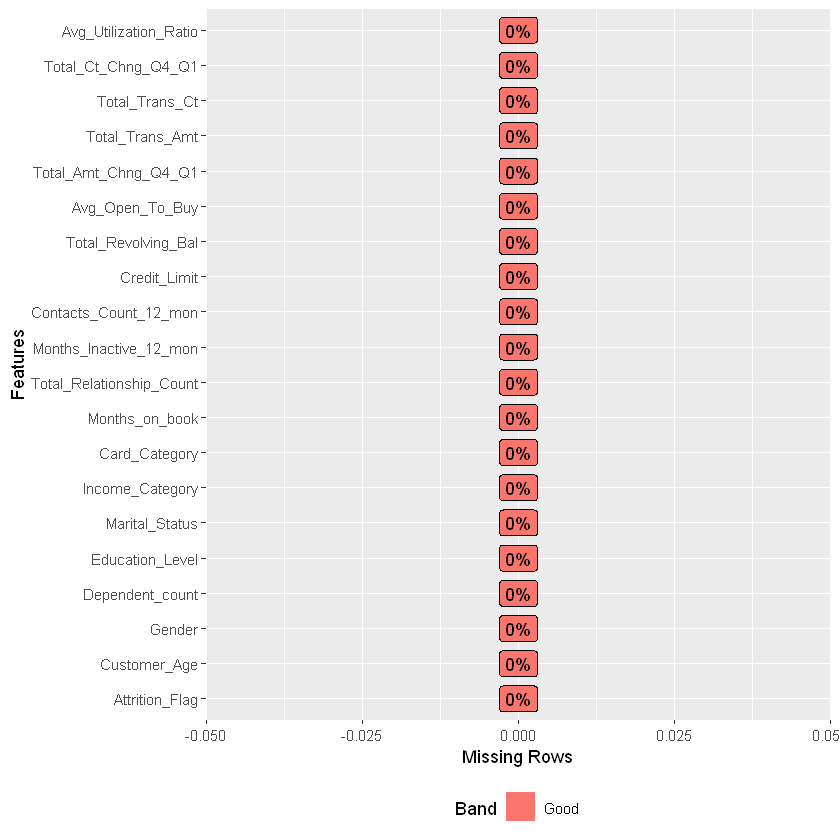

In [47]:
plot_missing(df)

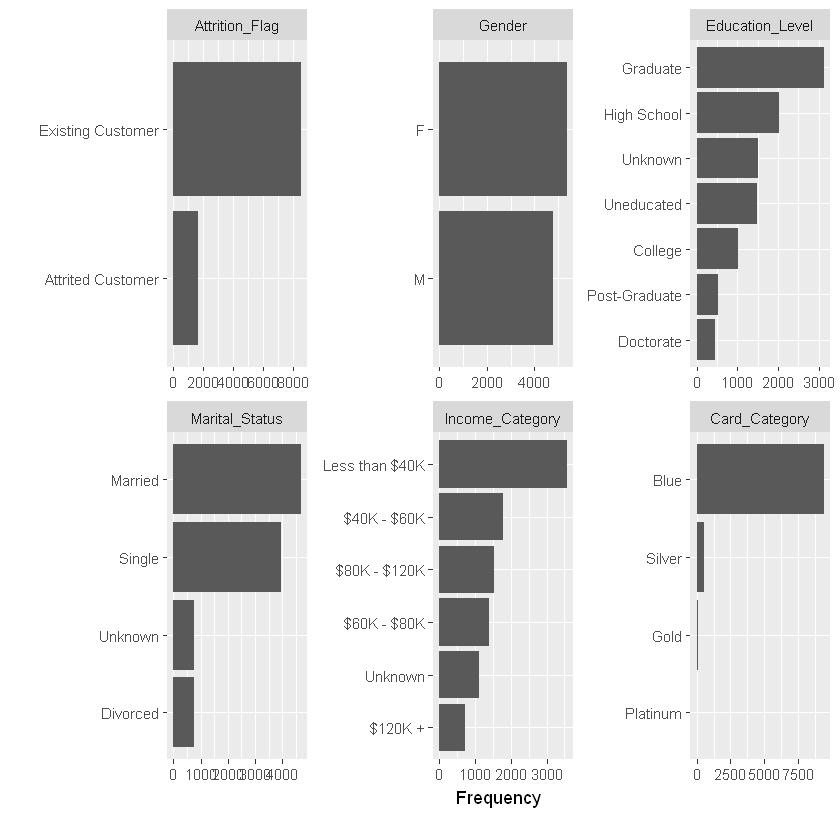

In [48]:
## frequency distribution of all discrete variables
plot_bar(df)


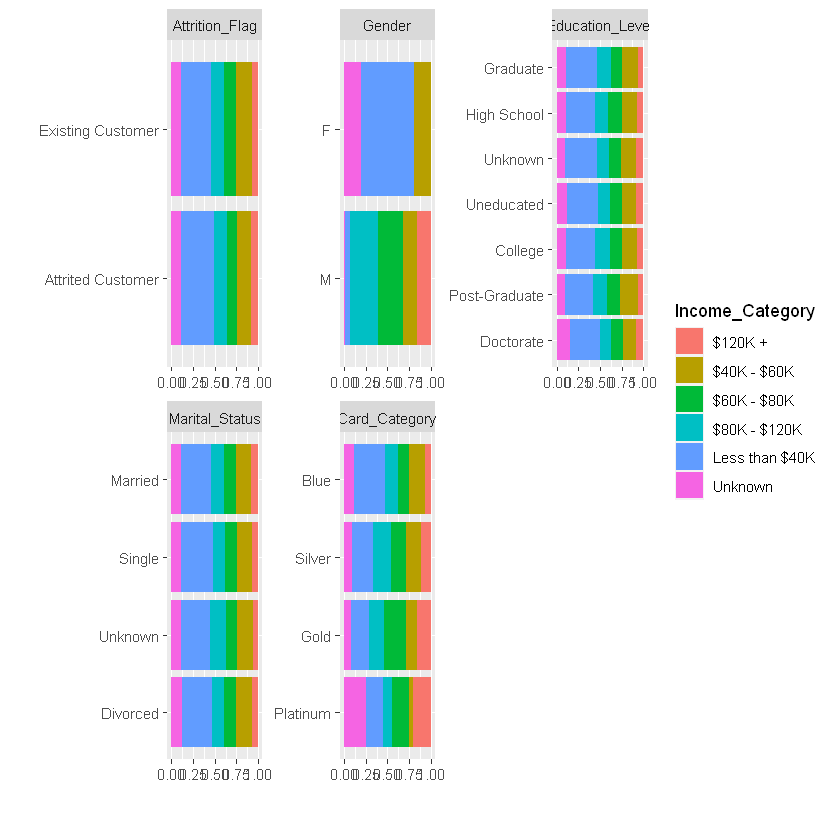

In [49]:
## View frequency distribution by a discrete variable
plot_bar(df, by = "Income_Category")

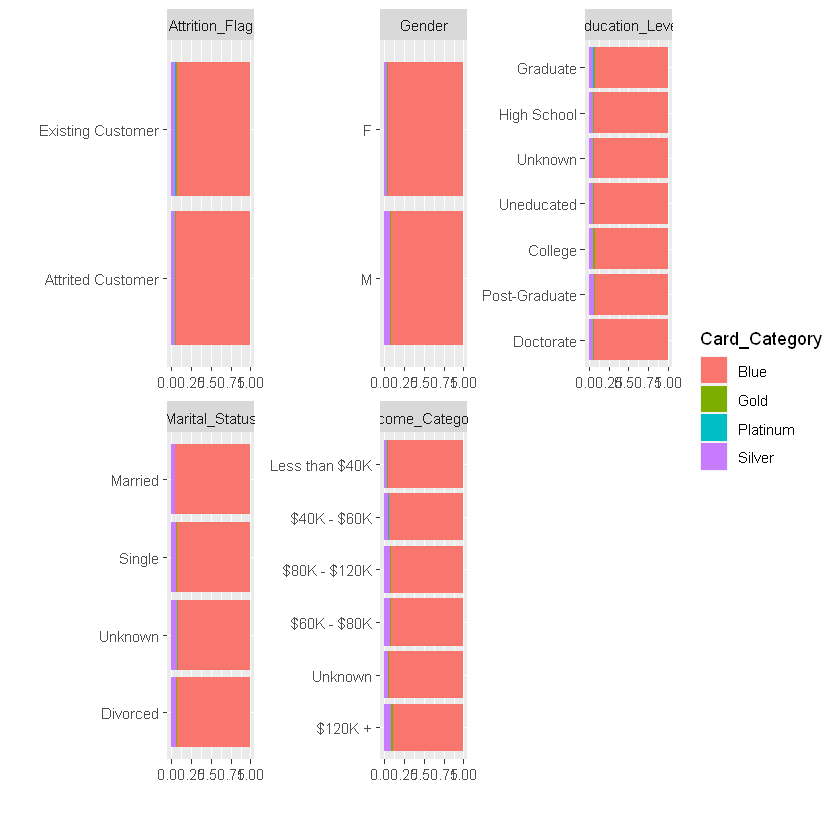

In [50]:
plot_bar(df, by = "Card_Category")

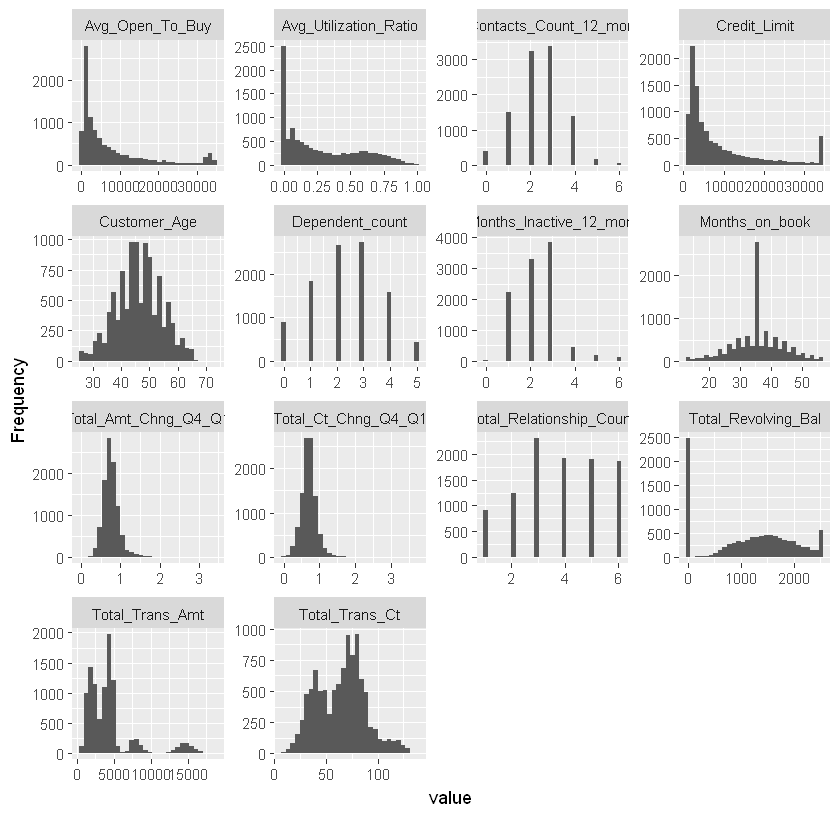

In [51]:
plot_histogram(df)

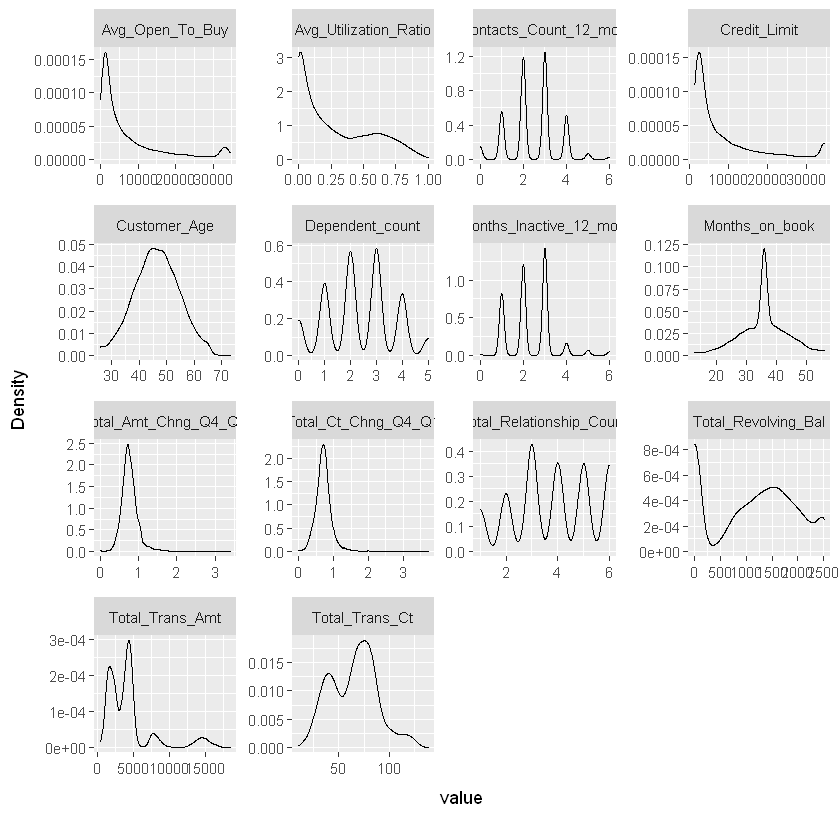

In [52]:
## View estimated density distribution of all continuous variables
plot_density(df)

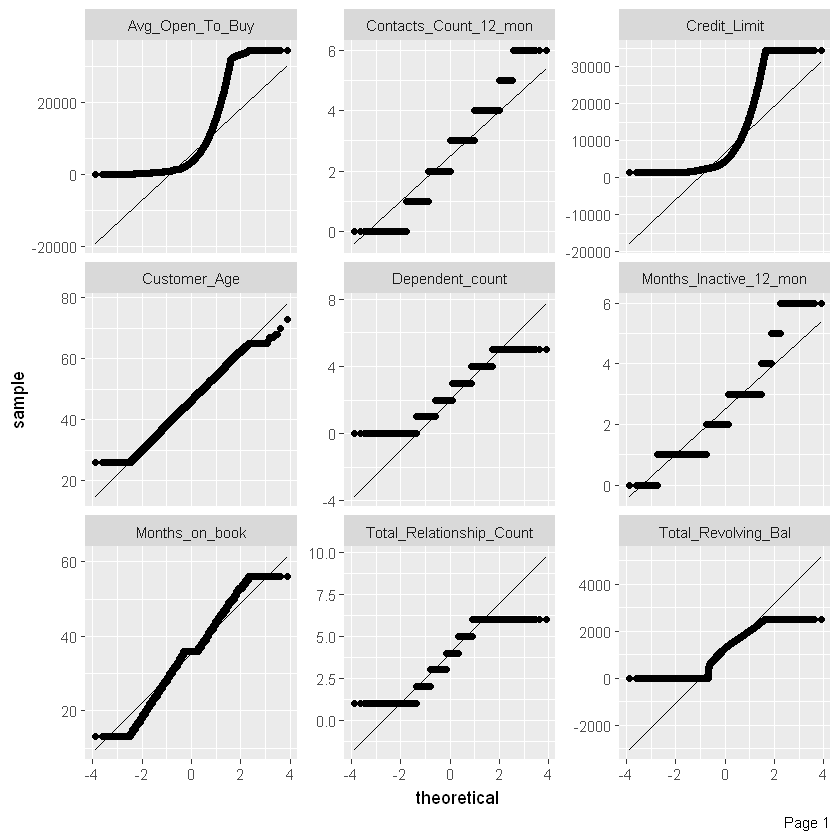

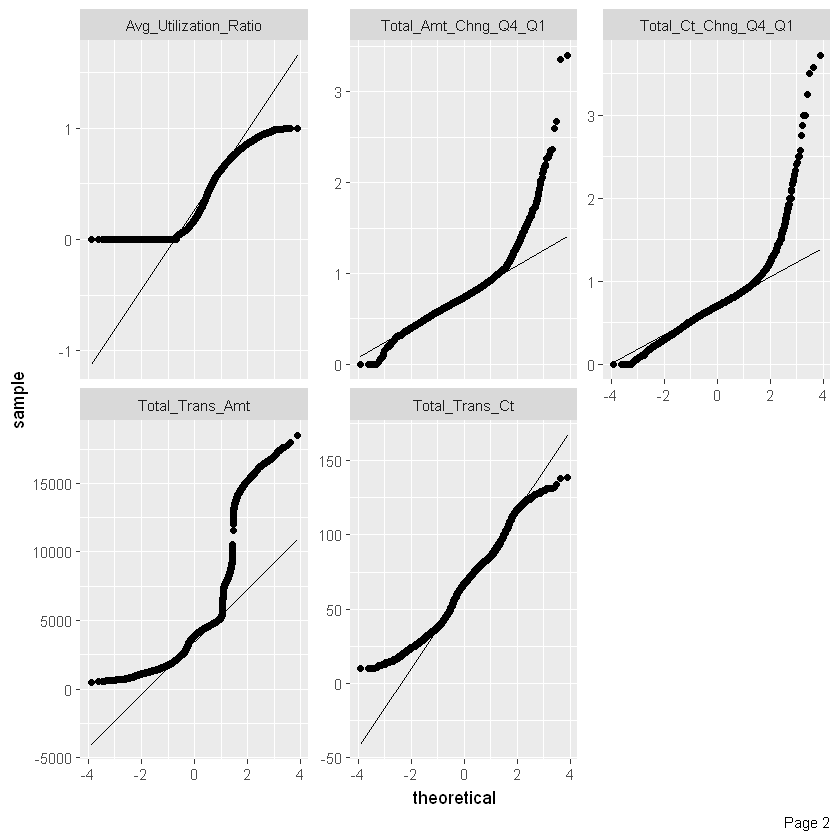

In [53]:
## View quantile-quantile plot of all continuous variables
plot_qq(df)

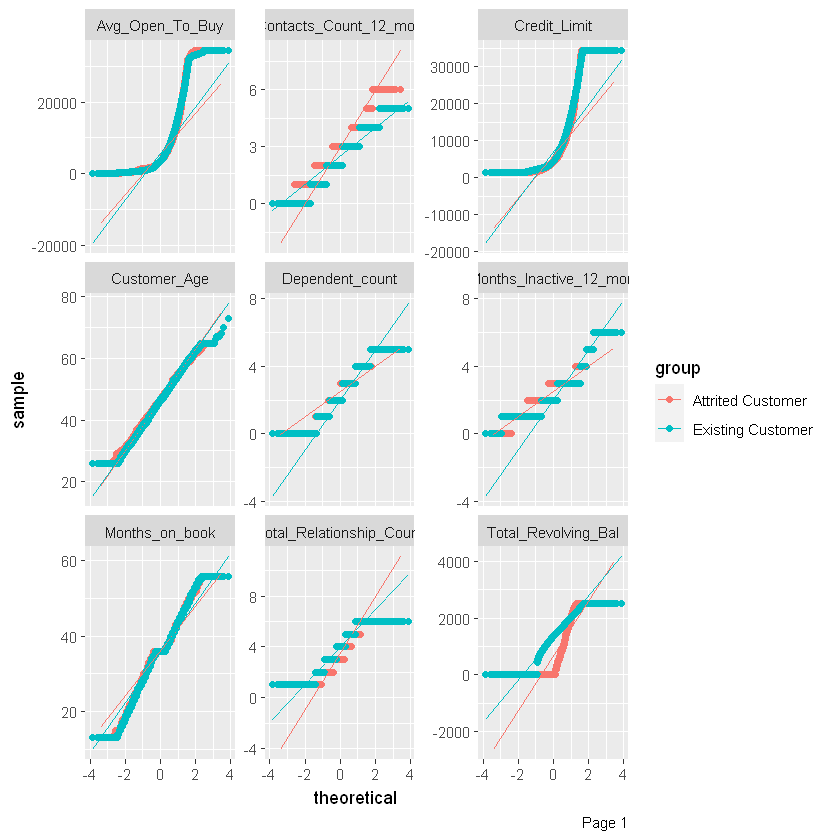

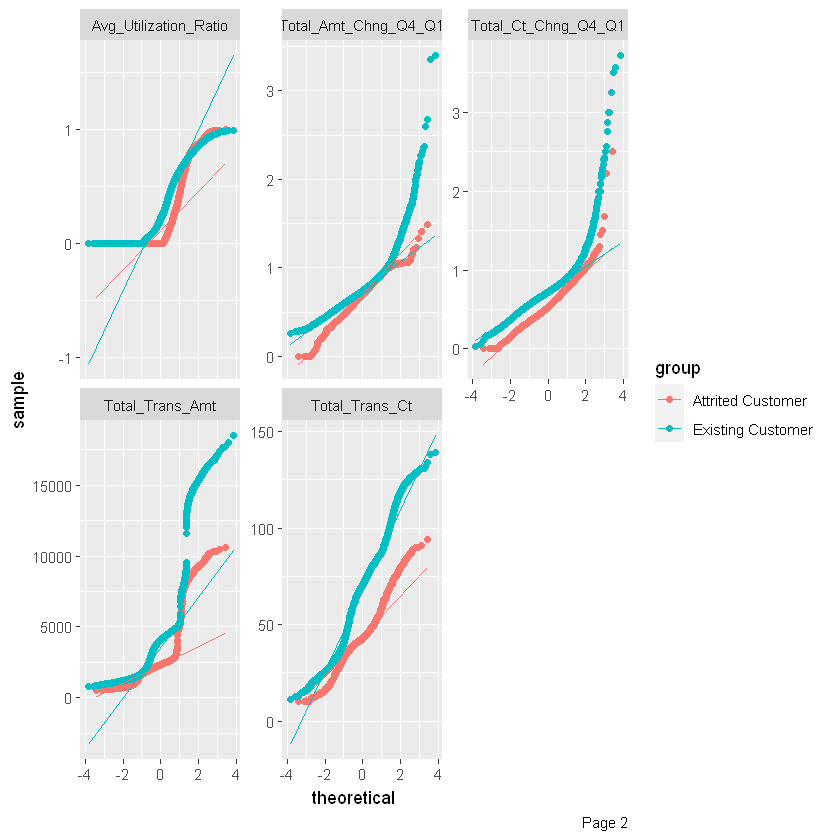

In [54]:
## View quantile-quantile plot of all continuous variables by feature `Attrition_Flag`
plot_qq(df, by = "Attrition_Flag")

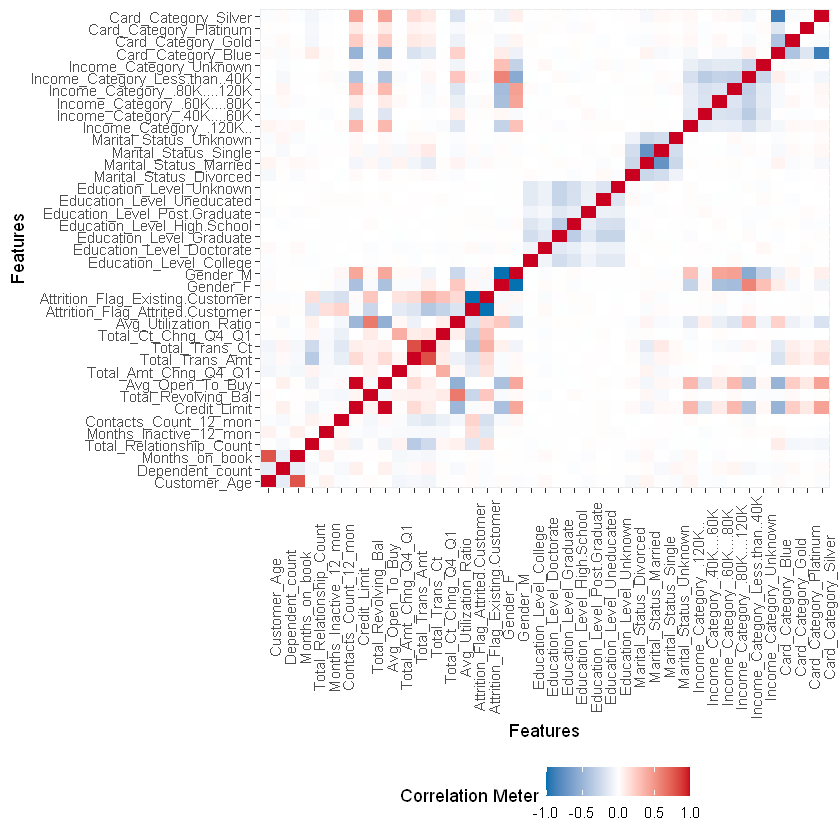

In [55]:
## View overall correlation heatmap
plot_correlation(df)

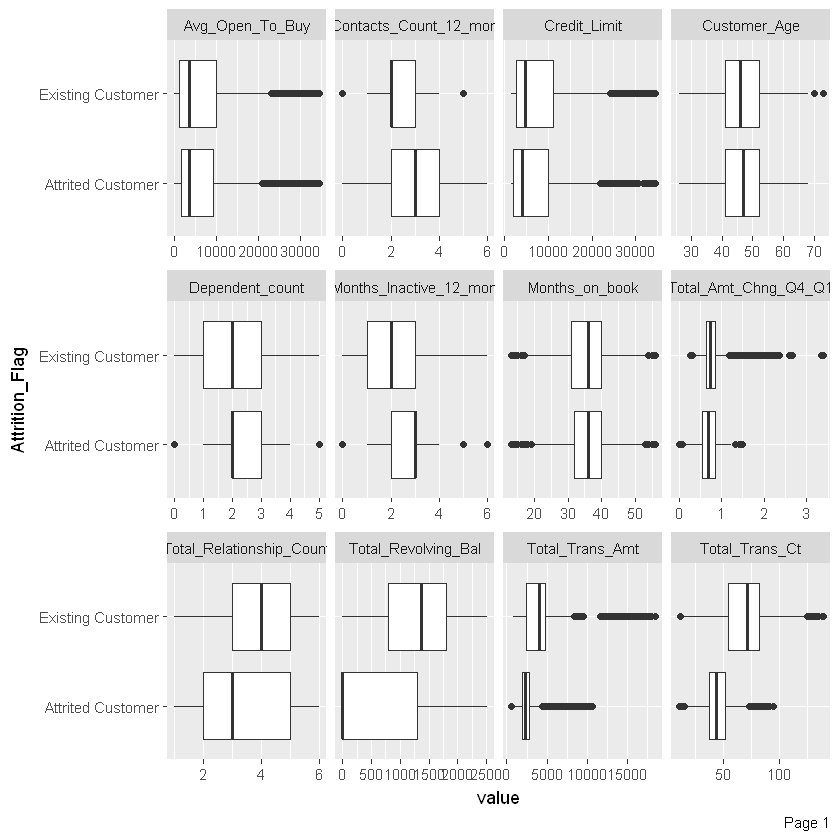

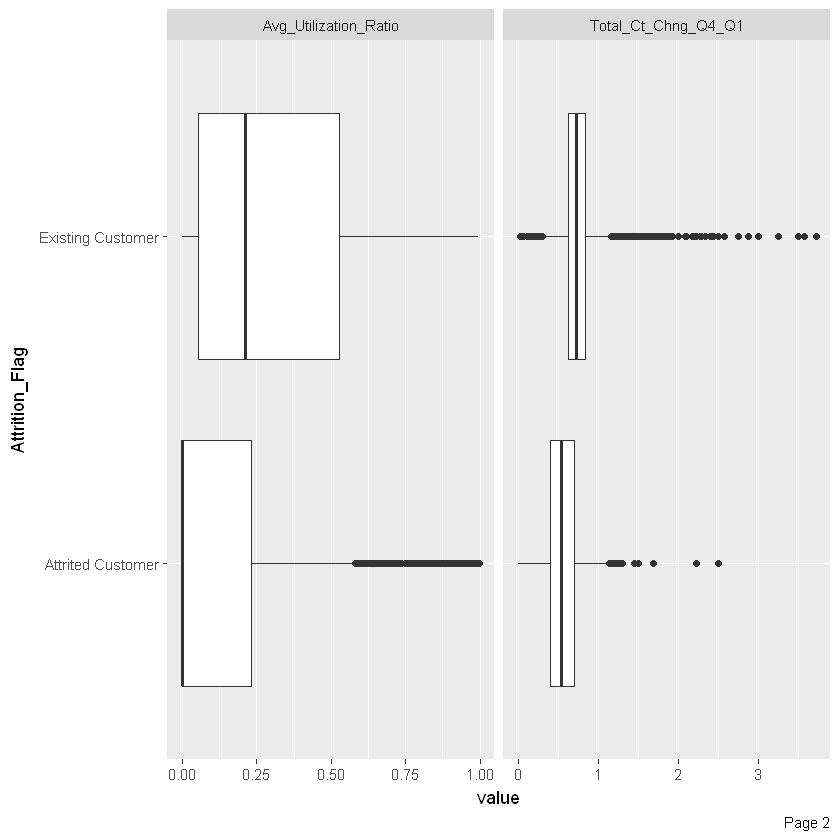

In [56]:
## View bivariate continuous distribution based on `Attrition_Flag`
plot_boxplot(df, by = "Attrition_Flag")

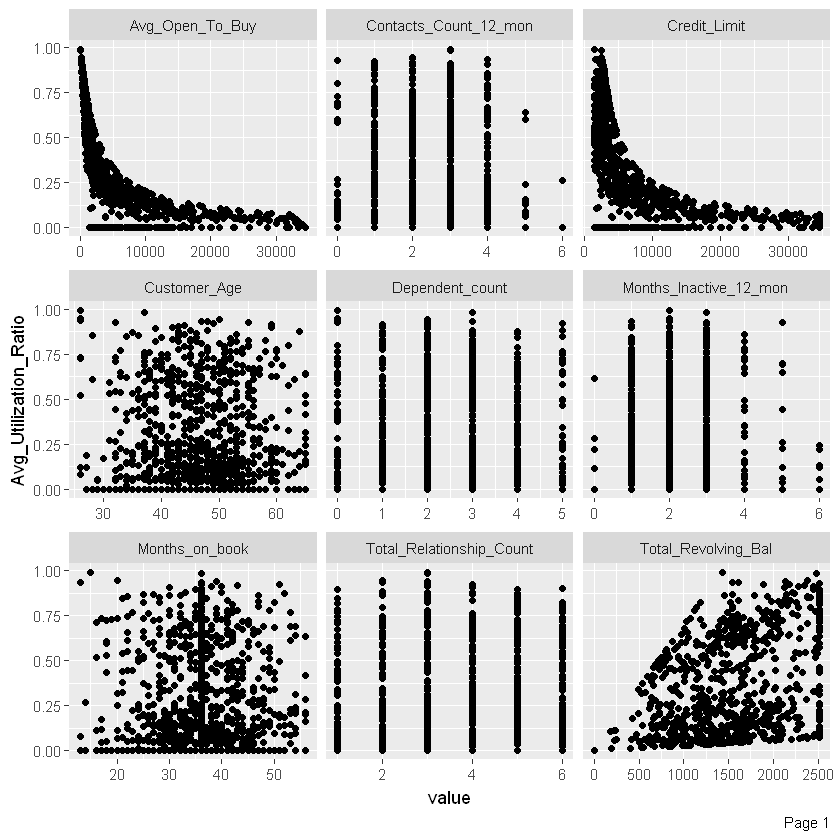

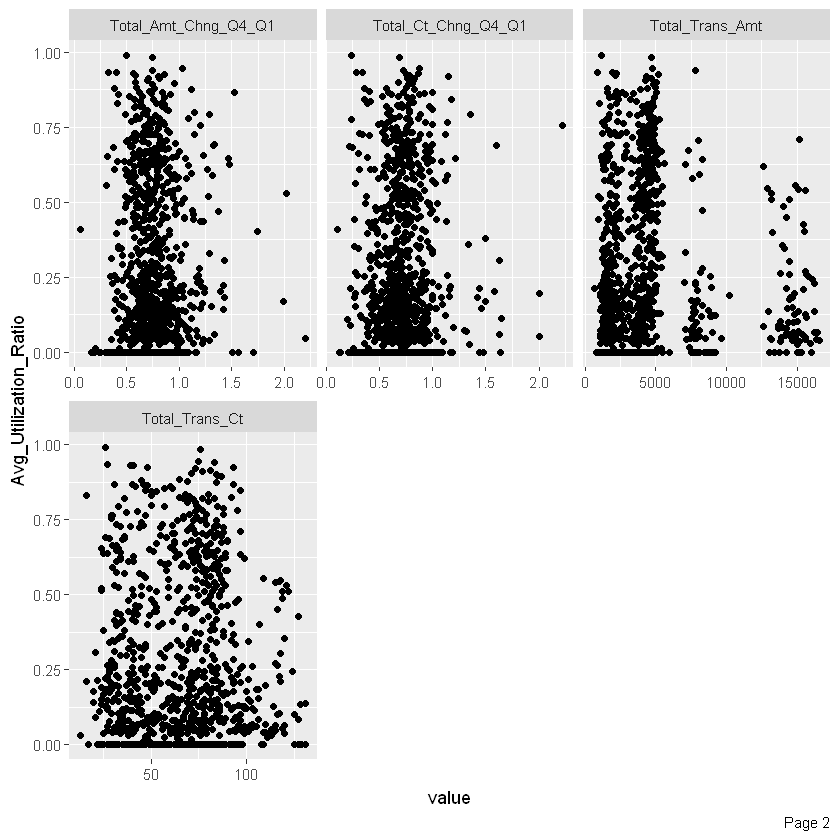

In [57]:
## Scatterplot `Avg_Utilization_Ratio` with all other continuous features
plot_scatterplot(split_columns(df)$continuous, by = "Avg_Utilization_Ratio", sampled_rows = 1000L)

2 features with more than 5 categories ignored!
Education_Level: 7 categories
Income_Category: 6 categories




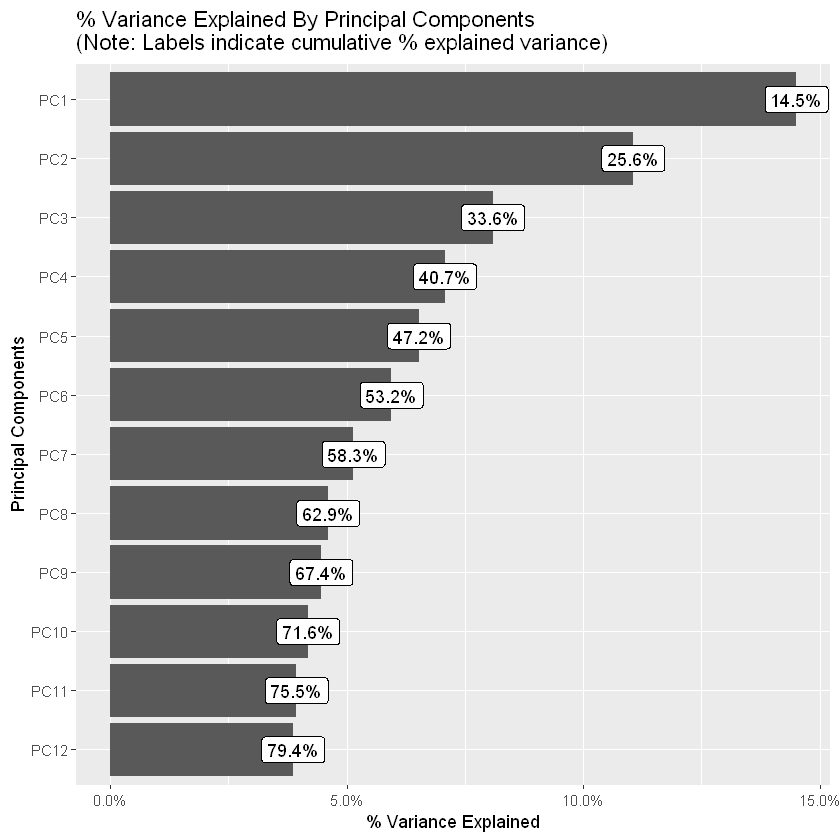

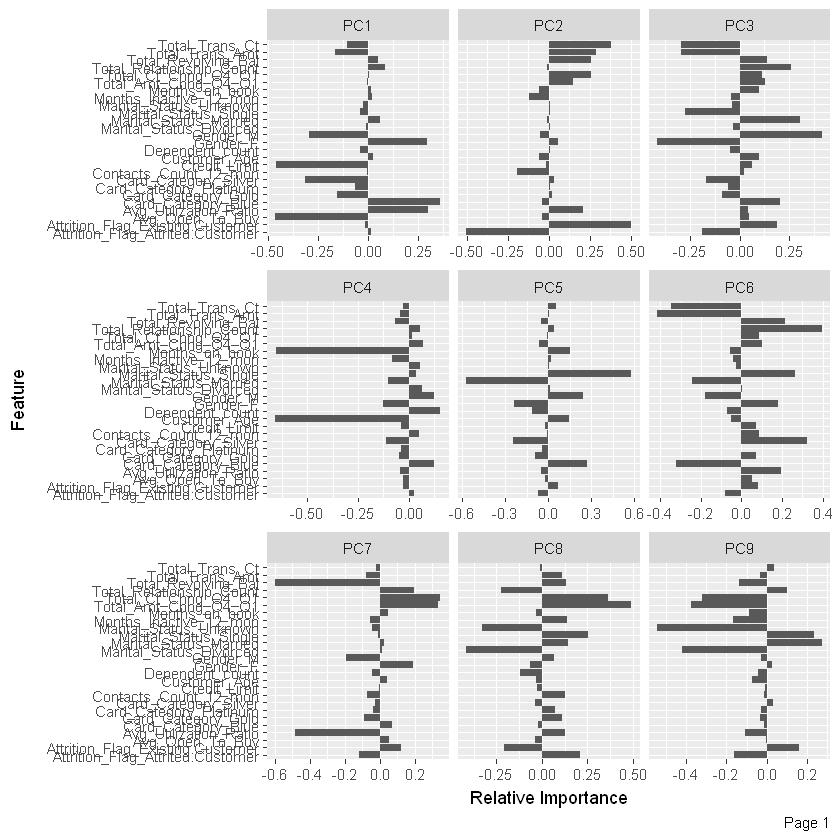

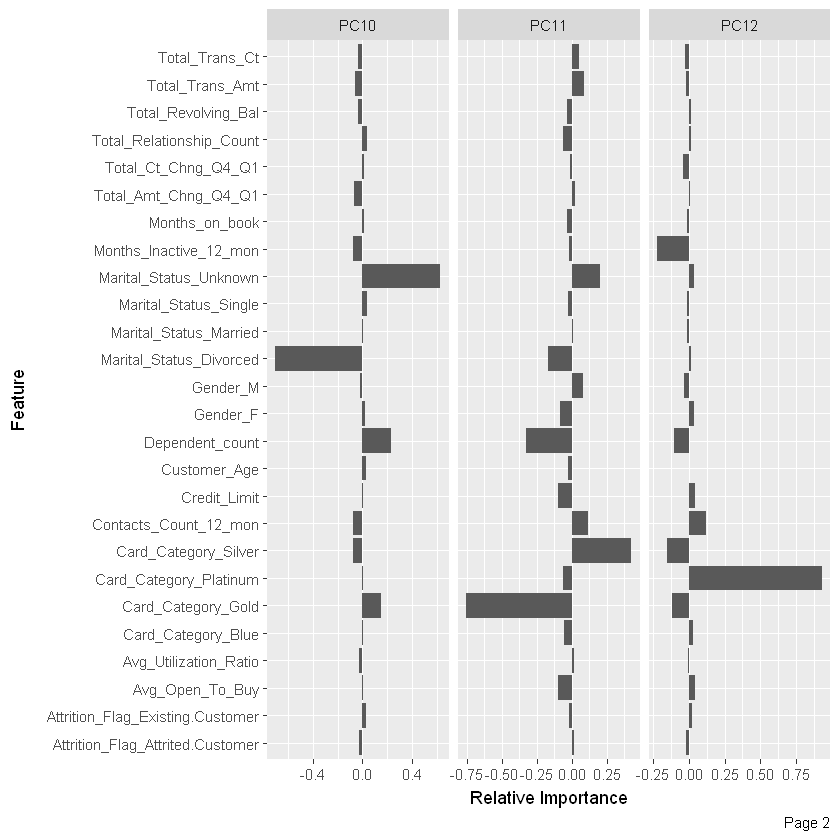

In [58]:
## Visualize principal component analysis
plot_prcomp(df, maxcat = 5L)

In [59]:
# DataExplorer::create_report(df)